<a href="https://colab.research.google.com/github/Hasti522004/AI_ML_Codes/blob/main/RainForcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx #for view Graph
import pylab as pl

In [2]:
edges = [(0,1),(0,2),(0,5),(0,6),(2,3),(2,4),(3,4),(3,6),(3,10),(6,7),(7,8),(8,10),(9,10),(10,10)]

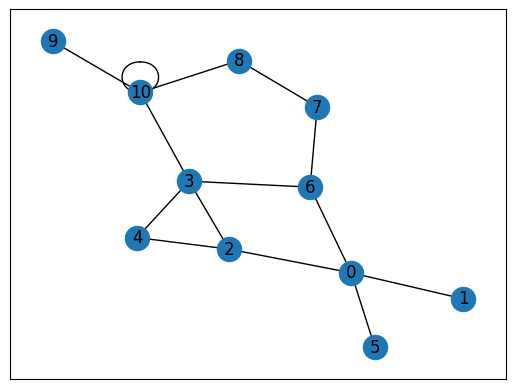

In [32]:
goal = 10
G= nx.Graph()
G.add_edges_from(edges)
fig = nx.spring_layout(G)
nx.draw_networkx_nodes(G,fig)
nx.draw_networkx_edges(G,fig)
nx.draw_networkx_labels(G,fig)
pl.show()

In [33]:
matrix_size = 11
R = np.matrix(np.ones(shape=(matrix_size,matrix_size)))
R*=-1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [34]:
for edge in edges:
  if(edge[1]==goal):
    R[edge]=100
  else:
    R[edge]=0
  if(edge[0]==goal):
    R[edge[::-1]]=100
  else:
    R[edge[::-1]]=0
R[goal,goal]=100

print(R)

[[ -1.   0.   0.  -1.  -1.   0.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.   0.  -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.   0. 100.]]


In [35]:
Q = np.matrix(np.zeros(shape=(matrix_size,matrix_size)))

In [36]:
def available_actions(state):
  current_actions = R[state,]
  available_actions = np.where(current_actions>=0)[1]
  return available_actions

In [37]:
def sample_next_action(available_action_list):
  next_action = int(np.random.choice(available_action_list,1))
  return next_action

In [40]:
def updating_Qmatrix(current_state,action,gamma):
  max_node = np.where(Q[action,] == np.max(Q[action,]))[1]
  if(max_node.shape[0]>1):
    max_index = int(np.random.choice(max_node,1))
  else:
    max_index = int(max_node)

  max_value = Q[action,max_index]
  Q[current_state,action] = R[current_state,action] + (gamma * max_value)

  if(np.max(Q)>0):
    return (np.sum(Q/np.max(Q))*100)
  else:
    return 0

<ipython-input-37-085c7b35bc5d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action_list,1))
<ipython-input-40-10d3e4d6d2aa>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_node,1))
<ipython-input-40-10d3e4d6d2aa>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_node)


Text(0, 0.5, 'Q value')

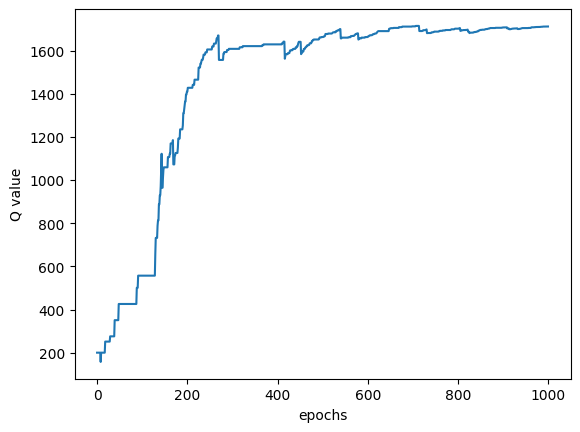

In [41]:
#Higher gamma value -> Higher Difficulty
#Lower gamma value -> Lower Difficulty level
gamma = 0.75
Qscore = []
for i in range (1000):
  initial_state = np.random.randint(0,int(Q.shape[0]))
  avai_act = available_actions(initial_state)
  action = sample_next_action(avai_act)
  score = updating_Qmatrix(initial_state,action,gamma)
  Qscore.append(score)

pl.plot(Qscore)
pl.xlabel("epochs")
pl.ylabel("Q value")